In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap
import pyodbc

In [28]:
server = "localhost"
database = "Spr_2024"
username = "omarmartinez66"
password = "CCny24081166"

cnxn = pyodbc.connect(
        "DRIVER={ODBC Driver 17 for SQL Server}; SERVER=" 
        
    + server
    + ";DATABASE="
    + database
    + ";UID="
    + username
    + ";PWD="
    + password
)

#cnxn.autocommit = True

In [29]:
cur = cnxn.cursor

In [30]:
sql_query = """SELECT [dbo].[OrderData].Order_Id, ROUND(Order_Profit_Per_Order,1) AS Order_Profit_Per_Order, 
ROUND(Order_Item_Profit_Ratio,1) AS Order_Item_Profit_Ratio, Order_Item_Quantity, ROUND(Order_Item_Total,1) AS Order_Item_Total, 
Delivery_Status, Shipping_Mode, [dbo].[ShippingData].Order_Id
FROM [dbo].[OrderData] LEFT JOIN [dbo].[ShippingData]
ON [dbo].[OrderData].Order_Id = [dbo].[ShippingData].Order_Id"""

In [31]:
sql_query

'SELECT [dbo].[OrderData].Order_Id, ROUND(Order_Profit_Per_Order,1) AS Order_Profit_Per_Order, \nROUND(Order_Item_Profit_Ratio,1) AS Order_Item_Profit_Ratio, Order_Item_Quantity, ROUND(Order_Item_Total,1) AS Order_Item_Total, \nDelivery_Status, Shipping_Mode, [dbo].[ShippingData].Order_Id\nFROM [dbo].[OrderData] LEFT JOIN [dbo].[ShippingData]\nON [dbo].[OrderData].Order_Id = [dbo].[ShippingData].Order_Id'

In [32]:
data = pd.read_sql(sql=sql_query, con=cnxn)
cnxn.close

<function Connection.close>

In [33]:
data.head()

,Order_Id,Order_Profit_Per_Order,Order_Item_Profit_Ratio,Order_Item_Quantity,Order_Item_Total,Delivery_Status,Shipping_Mode,Order_Id
0,75913,82.6,0.3,1,275.3,Shipping on time,Standard Class,75913
1,75927,24.6,0.1,1,245.8,Late delivery,First Class,75927
2,75935,18.6,0.1,1,295.0,Shipping canceled,Standard Class,75935
3,77202,91.3,0.3,1,314.6,Advance shipping,Standard Class,77202
4,75932,133.7,0.5,1,278.6,Late delivery,Second Class,75932


In [34]:
data.dtypes

Order_Id                    object
Order_Profit_Per_Order     float64
Order_Item_Profit_Ratio    float64
Order_Item_Quantity         object
Order_Item_Total           float64
Delivery_Status             object
Shipping_Mode               object
Order_Id                    object
dtype: object

<AxesSubplot:xlabel='Delivery_Status'>

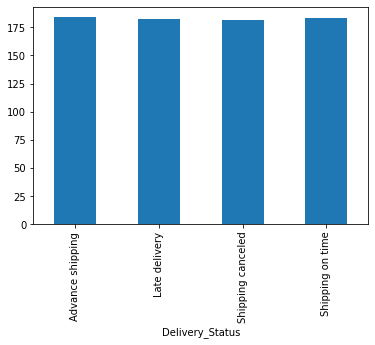

In [35]:
data.groupby('Delivery_Status')['Order_Item_Total'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Shipping_Mode'>

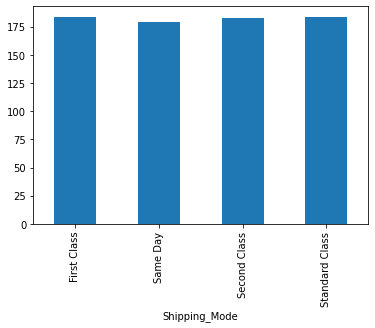

In [36]:
data.groupby('Shipping_Mode')['Order_Item_Total'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Order_Item_Quantity'>

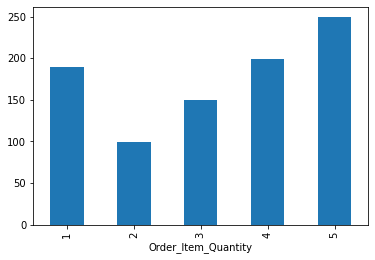

In [37]:
data.groupby('Order_Item_Quantity')['Order_Item_Total'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Order_Item_Quantity'>

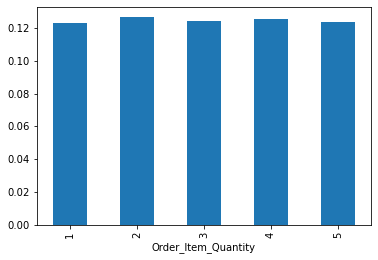

In [38]:
data.groupby('Order_Item_Quantity')['Order_Item_Profit_Ratio'].mean().plot(kind = 'bar')

In [39]:
sql_query = """SELECT [dbo].[ShippingData].Order_Id, Delivery_Status, Shipping_Mode, shipping_date_DateOrders, 
Category_Id, Category_Name, Product_Category_Id, Product_Price
FROM[dbo].[ShippingData] LEFT JOIN [dbo].[ProductData]
ON [dbo].[ShippingData].Order_Id = [dbo].[ProductData].[Product_Category_Id]"""

In [41]:
sql_query

'SELECT [dbo].[ShippingData].Order_Id, Delivery_Status, Shipping_Mode, shipping_date_DateOrders, \nCategory_Id, Category_Name, Product_Category_Id, Product_Price\nFROM[dbo].[ShippingData] LEFT JOIN [dbo].[ProductData]\nON [dbo].[ShippingData].Order_Id = [dbo].[ProductData].[Product_Category_Id]'

In [42]:
data = pd.read_sql(sql=sql_query, con=cnxn)
cnxn.close

<function Connection.close>

In [43]:
data.head()

,Order_Id,Delivery_Status,Shipping_Mode,shipping_date_DateOrders,Category_Id,Category_Name,Product_Category_Id,Product_Price
0,6723,Shipping on time,Standard Class,2015-04-13 03:00:00,NaN,None,None,NaN
1,53507,Advance shipping,Standard Class,2017-02-23 01:32:00,NaN,None,None,NaN
2,59327,Advance shipping,Standard Class,2017-05-19 00:32:00,NaN,None,None,NaN
3,335,Late delivery,Standard Class,2015-01-11 21:00:00,NaN,None,None,NaN
4,132,Advance shipping,Standard Class,2015-01-05 21:53:00,NaN,None,None,NaN


In [44]:
list(data.columns)

['Order_Id',
 'Delivery_Status',
 'Shipping_Mode',
 'shipping_date_DateOrders',
 'Category_Id',
 'Category_Name',
 'Product_Category_Id',
 'Product_Price']

In [45]:
data.dtypes

Order_Id                            object
Delivery_Status                     object
Shipping_Mode                       object
shipping_date_DateOrders    datetime64[ns]
Category_Id                        float64
Category_Name                       object
Product_Category_Id                 object
Product_Price                      float64
dtype: object

<AxesSubplot:xlabel='Delivery_Status'>

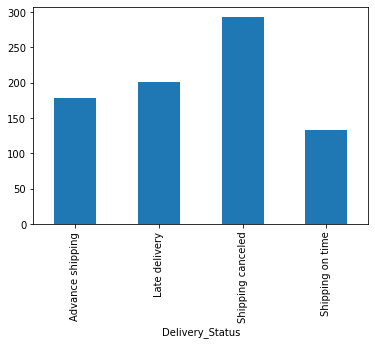

In [46]:
data.groupby('Delivery_Status')['Product_Price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Shipping_Mode'>

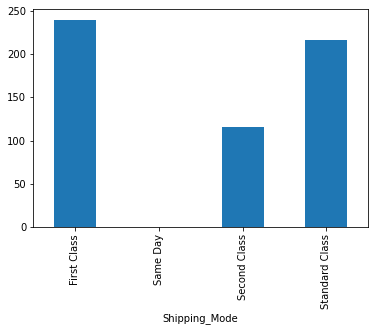

In [47]:
data.groupby('Shipping_Mode')['Product_Price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Category_Name'>

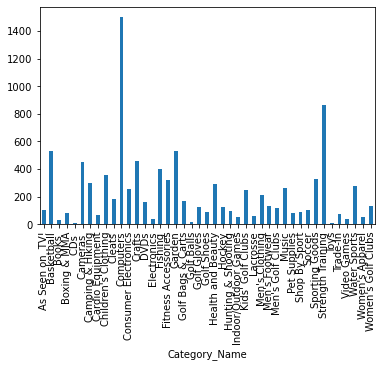

In [48]:
data.groupby('Category_Name')['Product_Price'].mean().plot(kind = 'bar')

In [49]:
sql_query = """SELECT OrderData.Order_Region,
    ROUND(OrderData.Sales,0) AS Rounded_Sales,
    OrderData.Order_Item_Profit_Ratio,
    ShippingData.Order_Id,
    ShippingData.Days_for_shipping_real,
    ShippingData.Days_for_shipment_scheduled

FROM OrderData
    LEFT JOIN ShippingData
        ON OrderData.Order_Id = ShippingData.Order_Id"""

In [50]:
sql_query

'SELECT OrderData.Order_Region,\n    ROUND(OrderData.Sales,0) AS Rounded_Sales,\n    OrderData.Order_Item_Profit_Ratio,\n    ShippingData.Order_Id,\n    ShippingData.Days_for_shipping_real,\n    ShippingData.Days_for_shipment_scheduled\n\nFROM OrderData\n    LEFT JOIN ShippingData\n        ON OrderData.Order_Id = ShippingData.Order_Id'

In [51]:
data = pd.read_sql(sql=sql_query, con=cnxn)
cnxn.close

<function Connection.close>

In [52]:
data.head()

,Order_Region,Rounded_Sales,Order_Item_Profit_Ratio,Order_Id,Days_for_shipping_real,Days_for_shipment_scheduled
0,Eastern Asia,328.0,-1.33,75906,2,1
1,Eastern Asia,328.0,0.30,75913,4,4
2,Western Europe,452.0,0.26,69424,0,0
3,Eastern Asia,328.0,0.33,75934,2,1
4,Northern Europe,240.0,-0.77,62314,5,4


In [53]:
list(data.columns)

['Order_Region',
 'Rounded_Sales',
 'Order_Item_Profit_Ratio',
 'Order_Id',
 'Days_for_shipping_real',
 'Days_for_shipment_scheduled']

In [54]:
data.dtypes

Order_Region                    object
Rounded_Sales                  float64
Order_Item_Profit_Ratio        float64
Order_Id                        object
Days_for_shipping_real           int64
Days_for_shipment_scheduled      int64
dtype: object

<AxesSubplot:xlabel='Order_Region'>

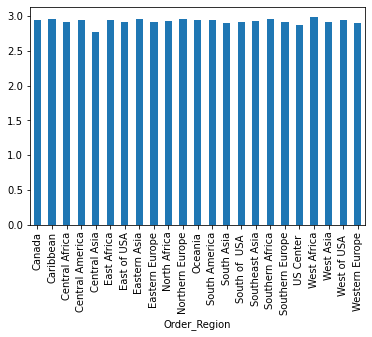

In [55]:
data.groupby('Order_Region')['Days_for_shipment_scheduled'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Order_Region'>

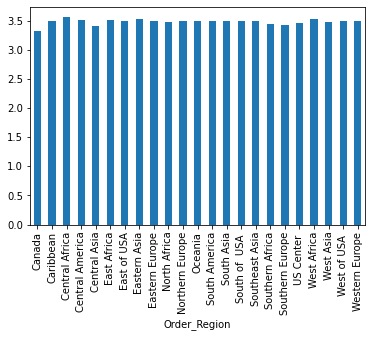

In [56]:
data.groupby('Order_Region')['Days_for_shipping_real'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Order_Region'>

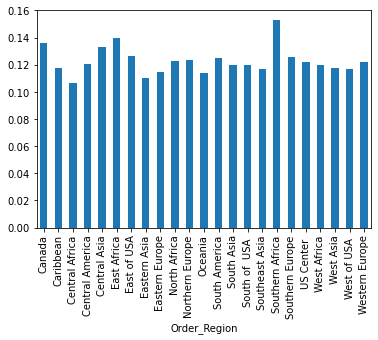

In [57]:
data.groupby('Order_Region')['Order_Item_Profit_Ratio'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Order_Region'>

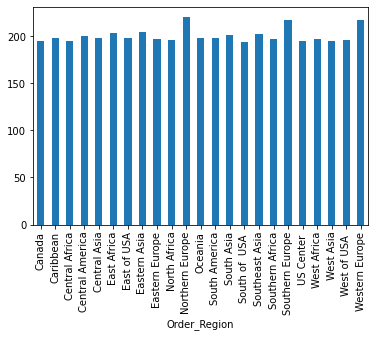

In [58]:
data.groupby('Order_Region')['Rounded_Sales'].mean().plot(kind = 'bar')